In [20]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

loading data from csv

In [23]:
df = pd.read_csv("./measurements")
df.head()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID,Week,Date
229,Satine,RGB_1.png,Depth_1.png,2.6,0.14,8.2,12.0,80.6,1,2021-W1,2021-01-04
362,Satine,RGB_2.png,Depth_2.png,2.1,0.10,8.5,8.2,67.4,2,2021-W1,2021-01-04
258,Satine,RGB_3.png,Depth_3.png,2.0,0.09,7.5,9.5,65.0,3,2021-W1,2021-01-04
263,Satine,RGB_4.png,Depth_4.png,2.7,0.13,6.0,10.6,78.7,4,2021-W1,2021-01-04
224,Lugano,RGB_5.png,Depth_5.png,2.3,0.11,8.3,9.8,73.9,5,2021-W1,2021-01-04


Pre-processing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         388 non-null    int64  
 1   Variety            388 non-null    object 
 2   RGB_Image          388 non-null    object 
 3   Depth_Information  388 non-null    object 
 4   FreshWeightShoot   388 non-null    float64
 5   DryWeightShoot     388 non-null    float64
 6   Height             388 non-null    float64
 7   Diameter           388 non-null    float64
 8   LeafArea           388 non-null    float64
 9   ID                 388 non-null    int64  
 10  Week               388 non-null    object 
 11  Date               388 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 36.5+ KB


In [24]:
df.isna().sum()

Variety              0
RGB_Image            0
Depth_Information    0
FreshWeightShoot     0
DryWeightShoot       0
Height               0
Diameter             0
LeafArea             0
ID                   0
Week                 0
Date                 0
dtype: int64

Analysis

In [25]:
print(f"shape df = {df.shape}")

shape df = (388, 11)


In [26]:
df.describe()

,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,115.455155,5.378144,12.325773,22.632216,1840.687371,195.175258
std,109.082466,4.541808,4.837003,6.291594,1521.690221,113.048777
min,1.400000,0.090000,4.300000,8.200000,57.600000,1.000000
25%,23.200000,1.555000,8.000000,18.100000,537.700000,97.750000
50%,78.200000,4.030000,12.000000,22.000000,1520.850000,194.500000
75%,184.325000,8.587500,16.000000,26.525000,2900.100000,292.250000
max,459.700000,20.100000,25.000000,42.000000,6875.400000,391.000000


In [27]:
df.Variety.value_counts()

Salanova    102
Satine       98
Lugano       96
Aphylion     92
Name: Variety, dtype: int64

<AxesSubplot: title={'center': 'instances per Variety'}>

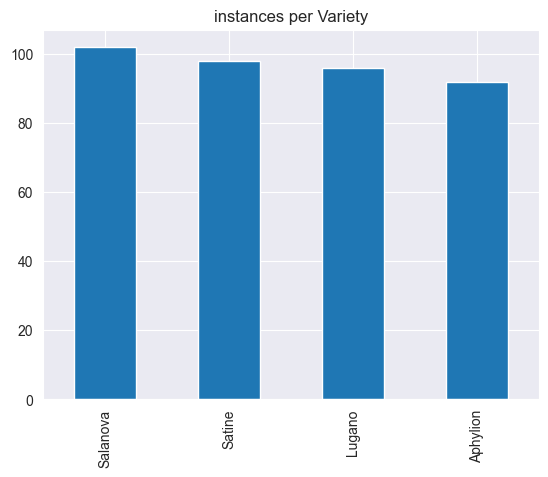

In [38]:
df.Variety.value_counts().sort_values(ascending=False).plot(kind='bar',title="instances per Variety")

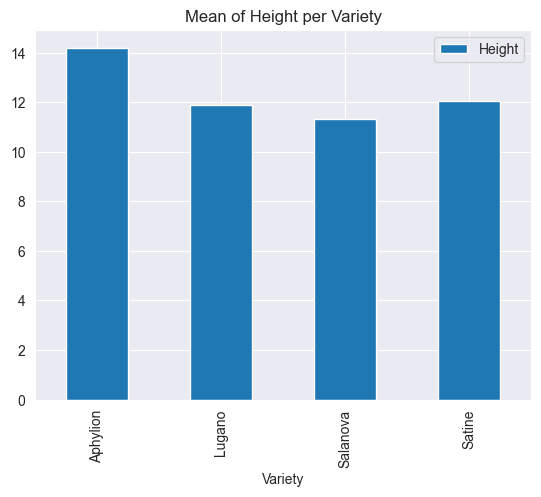

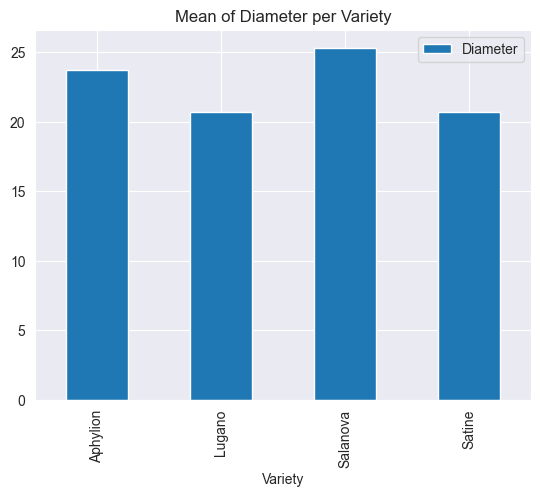

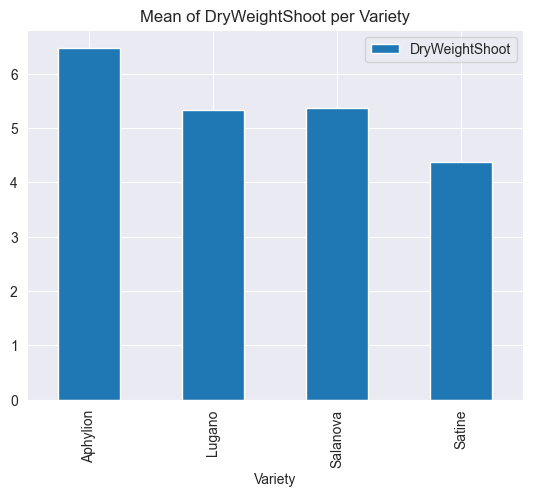

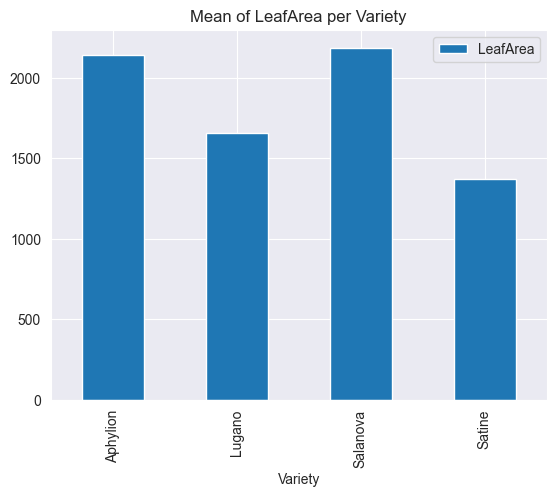

In [42]:
def mean_of_features_plot(feature="Height"):
    df[[feature,"Variety"]].groupby("Variety").mean().plot(kind="bar", title=f"Mean of {feature} per Variety")

mean_of_features_plot("Height")
mean_of_features_plot("Diameter")
mean_of_features_plot("DryWeightShoot")
mean_of_features_plot("LeafArea")

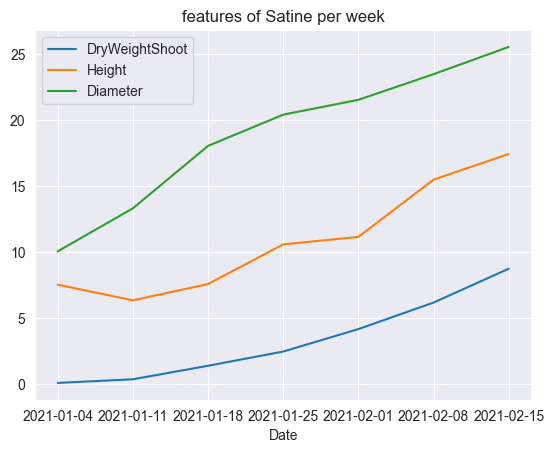

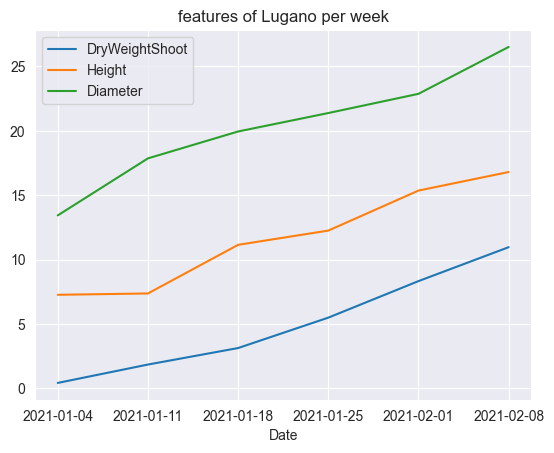

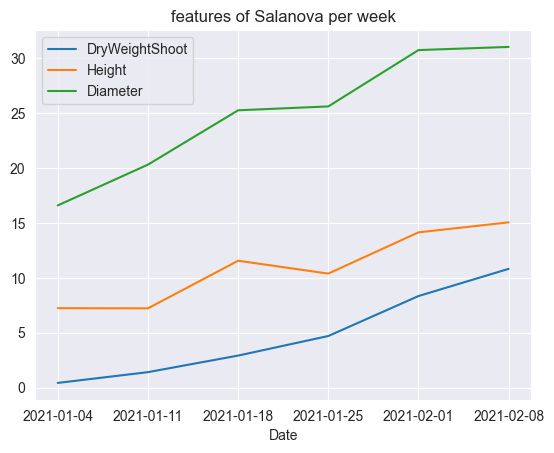

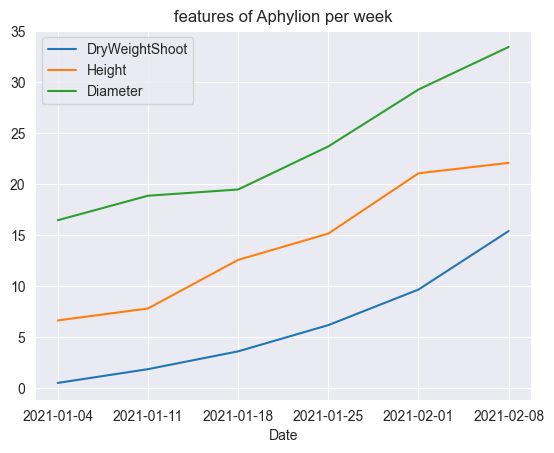

In [53]:
# excluding leafarea and FreshWeightshoot because scale of leaf area is much bigger

def lineplot_mean_features(variety=["Satine"]):
    for item in variety:
        df2 = df[[ "DryWeightShoot", "Height", "Diameter", "Date", "Variety"]].loc[df["Variety"] == item]
        df2.groupby("Date").mean().plot(kind="line", title=f"features of {item} per week")


lineplot_mean_features(["Satine", "Lugano", "Salanova", "Aphylion"])

In [79]:
def lineplot_mean_feature(feature="LeafArea"):
    df2 = df[[feature, "Date", "Variety" ]].groupby("Variety" ,"Date")
    sns.lineplot(data=df2, x="Date", y=feature, hue="Variety")


df = get_bbch_per_week(species, groupby)
fig, ax = plt.subplots(squeeze=True,figsize=(16,10))
sns.lineplot(data=df, x='weekmoment', y='BBCH', hue=hue,linewidth=1, palette="Paired", legend=True).set(title=species)
plt.show()

lineplot_mean_feature()

ValueError: Could not interpret value `Variety` for parameter `hue`

ValueError: Could not interpret value `Variety` for parameter `hue`

In [ ]:
from datetime import datetime


def get_feature_per_week(feature="LeafArea"):

    df2 = df[[feature, "Date", "Variety" ]].groupby("Variety" ,"Date").mean()
    return df2

def plot_bbch_over_time(species, groupby=['weekmoment', 'plantnummer'], hue='plantnummer'):
    df = get_feature_per_week("LeafArea")
    fig, ax = plt.subplots(squeeze=True, figsize=(16,10))
    sns.lineplot(data=df, x='weekmoment', y='BBCH', hue=hue,linewidth=1, palette="Paired", legend=True).set(title=species)
    plt.show()




In [6]:
df = df.loc[(df["Variety"] == "Lugano")]

df["ID"] = df["RGB_Image"].str.strip(".png").str.strip("RGB_")


In [7]:
# save lugano images to folder for visual inspection

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
thickness              = 1
lineType               = 2



path = './data/RGBImages'
for item in os.listdir(path):
    if item in df["RGB_Image"].values :

        img = cv2.imread(f"{path}/{item}")
        cv2.putText(img,f'',
                    bottomLeftCornerOfText,
                    font,
                    fontScale,
                    fontColor,
                    thickness,
                    lineType)
        cv2.imwrite(f'./data/lugano/{item}', img)


In [8]:
df.sort_index(inplace=True)
df

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9,27
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3,79
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6,140
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9,203
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6,292
...,...,...,...,...,...,...,...,...,...
357,Lugano,RGB_244.png,Depth_244.png,193.1,9.31,16.4,24.0,2715.4,244
358,Lugano,RGB_247.png,Depth_247.png,125.8,7.17,13.5,20.0,1957.0,247
359,Lugano,RGB_249.png,Depth_249.png,173.6,7.54,14.8,23.1,3278.3,249
360,Lugano,RGB_290.png,Depth_290.png,282.8,10.67,16.0,27.0,2741.1,290


In [9]:
df.sort_values(by="ID", ascending=False, inplace=True)



In [ ]:
df[["Height","FreshWeightShoot", "DryWeightShoot","Diameter","LeafArea"]].max()



In [ ]:
df[["Height","FreshWeightShoot", "DryWeightShoot","Diameter","LeafArea"]].min()

In [ ]:
plt.scatter(df["Height"], df["Diameter"])

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df.shape

In [ ]:
plt.boxplot(df["Height"])

In [ ]:
plt.scatter(df["LeafArea"], df["Height"])

In [ ]:
df.sort_values(["Height"], ascending=[True])